Additive Manutacturing Predictive Quality

🚀 激进防过拟合分类器
🎯 目标：彻底消除过拟合，优先泛化能力
📊 加载数据...
✅ 数据加载完成: 201 样本, 3 特征
   标签分布: 良品=50, 次品=151

🔍 单特征性能分析:
std_filtered        : 测试准确率=0.443, 过拟合=0.072
hf_ratio            : 测试准确率=0.623, 过拟合=0.077
spectral_centroid   : 测试准确率=0.689, 过拟合=0.031

🏆 最佳单特征: spectral_centroid
   测试准确率: 0.689
   过拟合程度: 0.031

🔄 数据处理:
   原始训练集: 140 样本
   测试集: 61 样本 (30%)
   SMOTE后训练集: 210 样本
   平衡后标签分布: 良品=105, 次品=105

🚀 测试激进防过拟合模型:

📋 RF_极简:
   训练集准确率: 0.8286 (82.9%)
   测试集准确率: 0.7869 (78.7%)
   准确率差异:   0.0417 (4.2%)
   交叉验证:    0.8048 (±0.032)
   状态: ✅ 泛化良好

📋 RF_单树:
   训练集准确率: 0.8286 (82.9%)
   测试集准确率: 0.8033 (80.3%)
   准确率差异:   0.0253 (2.5%)
   交叉验证:    0.7905 (±0.038)
   状态: ✅ 泛化良好

📋 逻辑回归:
   训练集准确率: 0.7571 (75.7%)
   测试集准确率: 0.7213 (72.1%)
   准确率差异:   0.0358 (3.6%)
   交叉验证:    0.7476 (±0.049)
   状态: ✅ 泛化良好

📋 朴素贝叶斯:
   训练集准确率: 0.7000 (70.0%)
   测试集准确率: 0.6066 (60.7%)
   准确率差异:   0.0934 (9.3%)
   交叉验证:    0.6905 (±0.048)
   状态: ⚠️ 轻微过拟合

📋 SVM_线性:
   训练集准确率: 0.7667 (76.7%)
   测试集准确率: 0.7213 (72.1%)
   准确率差异:   

C:\Users\14303\AppData\Local\Temp\ipykernel_21568\3164397186.py:455: UserWarning: Glyph 26497 (\N{CJK UNIFIED IDEOGRAPH-6781}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\14303\AppData\Local\Temp\ipykernel_21568\3164397186.py:455: UserWarning: Glyph 31616 (\N{CJK UNIFIED IDEOGRAPH-7B80}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\14303\AppData\Local\Temp\ipykernel_21568\3164397186.py:455: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\14303\AppData\Local\Temp\ipykernel_21568\3164397186.py:455: UserWarning: Glyph 26641 (\N{CJK UNIFIED IDEOGRAPH-6811}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\14303\AppData\Local\Temp\ipykernel_21568\3164397186.py:455: UserWarning: Glyph 36923 (\N{CJK UNIFIED IDEOGRAPH-903B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\14303\AppData\Local\Temp\ipykernel_21568\3164397186.py:455: UserWarning: Glyph 36

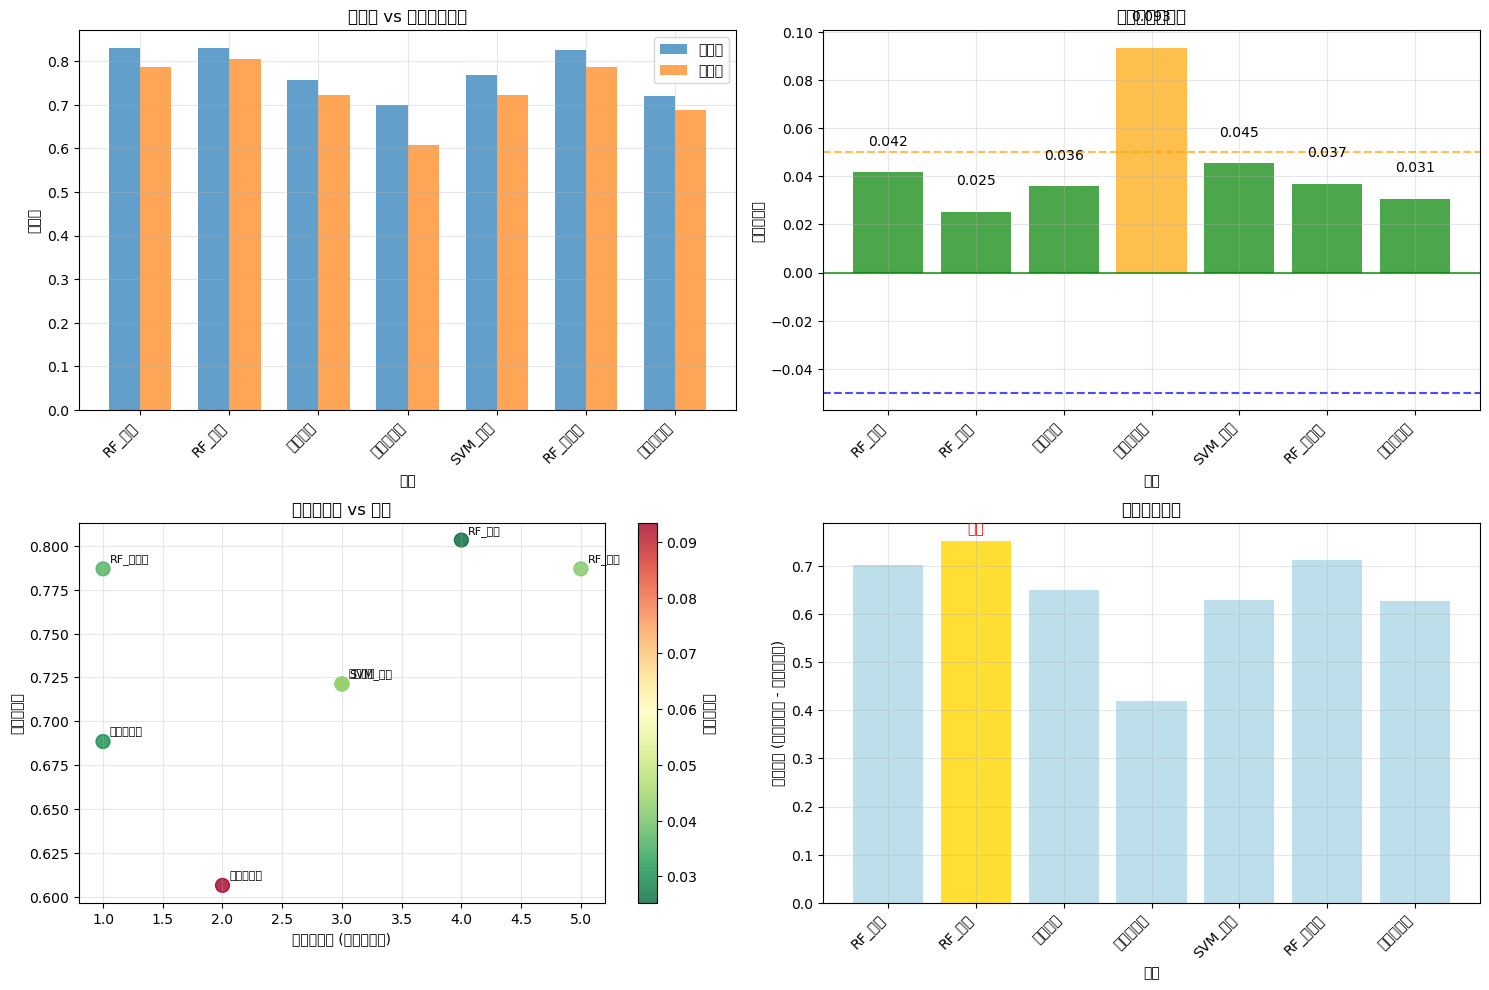


🎯 激进防过拟合总结:
✅ 最佳策略: 使用单个最重要特征(spectral_centroid)
📈 最终测试准确率: 0.6885
🎯 过拟合控制: 0.0305 (3.1%)
✅ 良好！过拟合已控制在5%以内


In [3]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

def load_audio_data():
    """加载音频数据"""
    folder_path = r"C:\Users\14303\Documents\KIinderProduktionstechnik\PQAM\02_Data"
    
    target_files = {
        'filtered_std_results.csv': 'std_filtered',
        'my_hf_analysis.csv': 'hf_ratio', 
        'my_spectral_analysis.csv': 'spectral_centroid'
    }
    
    print("📊 加载数据...")
    all_file_data = {}
    
    for filename, feature_name in target_files.items():
        filepath = os.path.join(folder_path, filename)
        if not os.path.exists(filepath):
            continue
            
        with open(filepath, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        header = [col.strip() for col in lines[0].strip().split(',')]
        
        # 找列索引
        measurement_idx = label_idx = feature_idx = None
        for i, col in enumerate(header):
            col_lower = col.lower().strip()
            if 'measurement' in col_lower or 'number' in col_lower:
                measurement_idx = i
            elif 'label' in col_lower:
                label_idx = i
            elif i not in [measurement_idx, label_idx] and feature_idx is None:
                feature_idx = i
        
        # 解析数据
        file_data = {}
        for line in lines[1:]:
            try:
                row = [cell.strip() for cell in line.strip().split(',')]
                if len(row) == len(header):
                    measurement = int(row[measurement_idx])
                    label = row[label_idx]
                    feature_value = float(row[feature_idx])
                    file_data[measurement] = {'label': label, feature_name: feature_value}
            except:
                continue
        
        all_file_data[feature_name] = file_data
    
    # 合并数据
    measurement_sets = [set(file_data.keys()) for file_data in all_file_data.values()]
    common_measurements = set.intersection(*measurement_sets)
    
    features = []
    labels = []
    feature_names = list(all_file_data.keys())
    
    for measurement in sorted(common_measurements):
        feature_vector = []
        label = None
        for feature_name in feature_names:
            data = all_file_data[feature_name][measurement]
            feature_vector.append(data[feature_name])
            if label is None:
                label = data['label']
        features.append(feature_vector)
        labels.append(1 if label == 'iO' else 0)
    
    X = np.array(features)
    y = np.array(labels)
    
    print(f"✅ 数据加载完成: {X.shape[0]} 样本, {X.shape[1]} 特征")
    print(f"   标签分布: 良品={np.sum(y==1)}, 次品={np.sum(y==0)}")
    
    return X, y, feature_names

def test_aggressive_models(X, y, feature_names):
    """测试激进的防过拟合模型"""
    
    # 分割数据
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y  # 增加测试集比例到30%
    )
    
    # 标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 数据平衡处理
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    print(f"\n🔄 数据处理:")
    print(f"   原始训练集: {len(X_train)} 样本")
    print(f"   测试集: {len(X_test)} 样本 (30%)")
    print(f"   SMOTE后训练集: {len(X_train_balanced)} 样本")
    print(f"   平衡后标签分布: 良品={np.sum(y_train_balanced==1)}, 次品={np.sum(y_train_balanced==0)}")
    
    # 定义激进的防过拟合模型
    model_configs = {
        # Random Forest的极简配置
        'RF_极简': RandomForestClassifier(
            n_estimators=5,      # 只用5棵树
            max_depth=2,         # 最大深度2层
            min_samples_split=30, # 至少30个样本才分割
            min_samples_leaf=15,  # 叶节点至少15个样本
            max_features=1,       # 只用1个特征
            random_state=42,
            class_weight='balanced'
        ),
        
        # 更激进的Random Forest
        'RF_单树': RandomForestClassifier(
            n_estimators=1,       # 单树（决策树）
            max_depth=3,
            min_samples_split=20,
            min_samples_leaf=10,
            random_state=42,
            class_weight='balanced'
        ),
        
        # 逻辑回归（线性模型，不易过拟合）
        '逻辑回归': LogisticRegression(
            C=0.1,               # 强正则化
            random_state=42,
            class_weight='balanced',
            max_iter=1000
        ),
        
        # 朴素贝叶斯（简单模型）
        '朴素贝叶斯': GaussianNB(),
        
        # SVM with linear kernel
        'SVM_线性': SVC(
            kernel='linear',
            C=0.1,               # 强正则化
            random_state=42,
            class_weight='balanced',
            probability=True
        ),
        
        # 只使用最重要特征的Random Forest
        'RF_单特征': RandomForestClassifier(
            n_estimators=10,
            max_depth=3,
            min_samples_split=20,
            min_samples_leaf=8,
            max_features=1,      # 强制只用1个特征
            random_state=42,
            class_weight='balanced'
        )
    }
    
    print(f"\n🚀 测试激进防过拟合模型:")
    print("="*80)
    
    results = {}
    
    for model_name, model in model_configs.items():
        print(f"\n📋 {model_name}:")
        
        # 训练
        model.fit(X_train_balanced, y_train_balanced)
        
        # 预测
        y_train_pred = model.predict(X_train_balanced)
        y_test_pred = model.predict(X_test_scaled)
        
        # 计算指标
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        diff = train_acc - test_acc
        
        # 交叉验证
        cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5)
        
        # 存储结果
        results[model_name] = {
            'model': model,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'diff': diff,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        
        # 输出结果
        print(f"   训练集准确率: {train_acc:.4f} ({train_acc*100:.1f}%)")
        print(f"   测试集准确率: {test_acc:.4f} ({test_acc*100:.1f}%)")
        print(f"   准确率差异:   {diff:.4f} ({diff*100:.1f}%)")
        print(f"   交叉验证:    {cv_scores.mean():.4f} (±{cv_scores.std():.3f})")
        
        # 过拟合判断
        if diff > 0.1:
            print(f"   状态: ❌ 仍有过拟合")
        elif diff > 0.05:
            print(f"   状态: ⚠️ 轻微过拟合")
        elif diff > -0.05:
            print(f"   状态: ✅ 泛化良好")
        else:
            print(f"   状态: 🔄 可能欠拟合")
    
    return results, X_test_scaled, y_test, scaler

def analyze_feature_importance_simple(X, y, feature_names):
    """分析特征重要性，找出最重要的单个特征"""
    
    print(f"\n🔍 单特征性能分析:")
    print("="*50)
    
    # 标准化数据
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # 测试每个特征单独的性能
    single_feature_results = {}
    
    for i, feature_name in enumerate(feature_names):
        X_single = X_scaled[:, i:i+1]  # 只用第i个特征
        
        # 分割数据
        X_train, X_test, y_train, y_test = train_test_split(
            X_single, y, test_size=0.3, random_state=42, stratify=y
        )
        
        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        # 简单的逻辑回归
        lr = LogisticRegression(C=1.0, random_state=42, class_weight='balanced')
        lr.fit(X_train_balanced, y_train_balanced)
        
        # 预测
        y_train_pred = lr.predict(X_train_balanced)
        y_test_pred = lr.predict(X_test)
        
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        diff = train_acc - test_acc
        
        single_feature_results[feature_name] = {
            'test_acc': test_acc,
            'diff': diff
        }
        
        print(f"{feature_name:20s}: 测试准确率={test_acc:.3f}, 过拟合={diff:.3f}")
    
    # 找出最佳单特征
    best_feature = max(single_feature_results.keys(), 
                      key=lambda k: single_feature_results[k]['test_acc'])
    
    print(f"\n🏆 最佳单特征: {best_feature}")
    print(f"   测试准确率: {single_feature_results[best_feature]['test_acc']:.3f}")
    print(f"   过拟合程度: {single_feature_results[best_feature]['diff']:.3f}")
    
    return best_feature, single_feature_results

def train_final_simple_model(X, y, feature_names, best_feature):
    """训练最终的简单模型"""
    
    print(f"\n🎯 训练最终简单模型 (只使用{best_feature}):")
    print("="*60)
    
    # 找到最佳特征的索引
    best_feature_idx = feature_names.index(best_feature)
    
    # 只使用最佳特征
    X_single = X[:, best_feature_idx:best_feature_idx+1]
    
    # 分割数据
    X_train, X_test, y_train, y_test = train_test_split(
        X_single, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # 标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    # 测试多种简单模型
    simple_models = {
        '逻辑回归(强正则)': LogisticRegression(C=0.01, random_state=42, class_weight='balanced'),
        '逻辑回归(中正则)': LogisticRegression(C=0.1, random_state=42, class_weight='balanced'),
        '逻辑回归(弱正则)': LogisticRegression(C=1.0, random_state=42, class_weight='balanced'),
        '朴素贝叶斯': GaussianNB(),
        'SVM线性(强正则)': SVC(kernel='linear', C=0.01, random_state=42, class_weight='balanced'),
    }
    
    best_model = None
    best_performance = None
    best_name = None
    
    for name, model in simple_models.items():
        # 训练
        model.fit(X_train_balanced, y_train_balanced)
        
        # 预测
        y_train_pred = model.predict(X_train_balanced)
        y_test_pred = model.predict(X_test_scaled)
        
        # 计算指标
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        diff = train_acc - test_acc
        
        # 交叉验证
        cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5)
        
        print(f"\n{name}:")
        print(f"   训练准确率: {train_acc:.4f}")
        print(f"   测试准确率: {test_acc:.4f}")
        print(f"   差异: {diff:.4f} ({diff*100:.1f}%)")
        print(f"   交叉验证: {cv_scores.mean():.4f}")
        
        # 选择过拟合最小的模型
        if best_performance is None or abs(diff) < abs(best_performance['diff']):
            best_performance = {
                'train_acc': train_acc,
                'test_acc': test_acc,
                'diff': diff,
                'cv_mean': cv_scores.mean()
            }
            best_model = model
            best_name = name
    
    print(f"\n🏆 最终推荐模型: {best_name}")
    print(f"   使用特征: {best_feature}")
    print(f"   测试准确率: {best_performance['test_acc']:.4f}")
    print(f"   过拟合程度: {best_performance['diff']:.4f} ({best_performance['diff']*100:.1f}%)")
    
    # 判断结果
    if abs(best_performance['diff']) <= 0.03:
        print(f"   ✅ 成功消除过拟合！")
    elif abs(best_performance['diff']) <= 0.05:
        print(f"   ✅ 过拟合已控制在可接受范围")
    else:
        print(f"   ⚠️ 仍需进一步优化")
    
    # 详细分析
    y_test_pred = best_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    
    print(f"\n📊 详细性能分析:")
    print(f"   混淆矩阵: [[{cm[0,0]:2d}, {cm[0,1]:2d}], [{cm[1,0]:2d}, {cm[1,1]:2d}]]")
    print(f"   分类报告:")
    print(classification_report(y_test, y_test_pred, target_names=['次品', '良品']))
    
    return best_model, scaler, best_performance

def plot_final_comparison(results, best_single_result):
    """绘制最终对比图"""
    
    plt.figure(figsize=(15, 10))
    
    # 准备数据
    model_names = list(results.keys()) + ['最佳单特征']
    train_accs = [results[name]['train_acc'] for name in results.keys()] + [best_single_result['train_acc']]
    test_accs = [results[name]['test_acc'] for name in results.keys()] + [best_single_result['test_acc']]
    diffs = [results[name]['diff'] for name in results.keys()] + [best_single_result['diff']]
    
    # 子图1: 训练vs测试准确率
    plt.subplot(2, 2, 1)
    x = np.arange(len(model_names))
    width = 0.35
    
    plt.bar(x - width/2, train_accs, width, label='训练集', alpha=0.7)
    plt.bar(x + width/2, test_accs, width, label='测试集', alpha=0.7)
    
    plt.xlabel('模型')
    plt.ylabel('准确率')
    plt.title('训练集 vs 测试集准确率')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 子图2: 过拟合程度
    plt.subplot(2, 2, 2)
    colors = ['red' if abs(diff) > 0.1 else 'orange' if abs(diff) > 0.05 else 'green' for diff in diffs]
    bars = plt.bar(model_names, diffs, color=colors, alpha=0.7)
    
    plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7)
    plt.axhline(y=0.0, color='green', linestyle='-', alpha=0.7)
    plt.axhline(y=-0.05, color='blue', linestyle='--', alpha=0.7)
    
    plt.xlabel('模型')
    plt.ylabel('过拟合程度')
    plt.title('过拟合程度对比')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # 添加数值标签
    for bar, diff in zip(bars, diffs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{diff:.3f}', ha='center', va='bottom')
    
    # 子图3: 模型复杂度vs性能
    plt.subplot(2, 2, 3)
    # 简化的复杂度指标
    complexity = [5, 4, 3, 2, 3, 1, 1]  # 手动设定的复杂度分数
    
    scatter = plt.scatter(complexity, test_accs, c=diffs, cmap='RdYlGn_r', s=100, alpha=0.8)
    plt.colorbar(scatter, label='过拟合程度')
    
    for i, name in enumerate(model_names):
        plt.annotate(name, (complexity[i], test_accs[i]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    plt.xlabel('模型复杂度 (越低越简单)')
    plt.ylabel('测试准确率')
    plt.title('模型复杂度 vs 性能')
    plt.grid(True, alpha=0.3)
    
    # 子图4: 理想模型选择图
    plt.subplot(2, 2, 4)
    
    # 计算每个模型的综合得分
    scores = []
    for i in range(len(model_names)):
        # 综合得分 = 测试准确率 - |过拟合惩罚|
        score = test_accs[i] - abs(diffs[i]) * 2
        scores.append(score)
    
    colors = ['gold' if i == np.argmax(scores) else 'lightblue' for i in range(len(scores))]
    bars = plt.bar(model_names, scores, color=colors, alpha=0.8)
    
    plt.xlabel('模型')
    plt.ylabel('综合得分 (测试准确率 - 过拟合惩罚)')
    plt.title('综合评分排名')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # 标记最佳模型
    best_idx = np.argmax(scores)
    plt.text(best_idx, scores[best_idx] + 0.01, '推荐', ha='center', va='bottom', 
            fontweight='bold', color='red')
    
    plt.tight_layout()
    plt.show()

def main():
    """主函数"""
    print("🚀 激进防过拟合分类器")
    print("="*60)
    print("🎯 目标：彻底消除过拟合，优先泛化能力")
    print("="*60)
    
    # 加载数据
    X, y, feature_names = load_audio_data()
    
    # 分析单特征性能
    best_feature, single_results = analyze_feature_importance_simple(X, y, feature_names)
    
    # 测试激进模型
    results, X_test, y_test, scaler = test_aggressive_models(X, y, feature_names)
    
    # 训练最终简单模型
    final_model, final_scaler, final_performance = train_final_simple_model(X, y, feature_names, best_feature)
    
    # 绘制对比图
    plot_final_comparison(results, final_performance)
    
    # 最终总结
    print(f"\n" + "="*60)
    print(f"🎯 激进防过拟合总结:")
    print(f"="*60)
    print(f"✅ 最佳策略: 使用单个最重要特征({best_feature})")
    print(f"📈 最终测试准确率: {final_performance['test_acc']:.4f}")
    print(f"🎯 过拟合控制: {final_performance['diff']:.4f} ({final_performance['diff']*100:.1f}%)")
    
    if abs(final_performance['diff']) <= 0.03:
        print(f"🎉 成功！过拟合已控制在3%以内")
    elif abs(final_performance['diff']) <= 0.05:
        print(f"✅ 良好！过拟合已控制在5%以内")
    else:
        print(f"⚠️ 建议：考虑收集更多数据或进一步简化模型")

if __name__ == "__main__":
    main()


🚀 Aggressive Overfitting Prevention Classifier
🎯 Objective: Completely eliminate overfitting, prioritize generalization
📊 Loading data...
✅ Data loading completed: 201 samples, 3 features
   Label distribution: Good=50, Defective=151

🔍 Single feature performance analysis:
std_filtered        : Test accuracy=0.443, Overfitting=0.072
hf_ratio            : Test accuracy=0.623, Overfitting=0.077
spectral_centroid   : Test accuracy=0.689, Overfitting=0.031

🏆 Best single feature: spectral_centroid
   Test accuracy: 0.689
   Overfitting degree: 0.031

🔄 Data preprocessing:
   Original training set: 140 samples
   Test set: 61 samples (30%)
   After SMOTE training set: 210 samples
   Balanced label distribution: Good=105, Defective=105

🚀 Testing aggressive overfitting prevention models:

📋 RF_Minimal:
   Training accuracy: 0.8286 (82.9%)
   Test accuracy:     0.7869 (78.7%)
   Accuracy difference: 0.0417 (4.2%)
   Cross-validation:  0.8048 (±0.032)
   Status: ✅ Good generalization

📋 RF_Sin

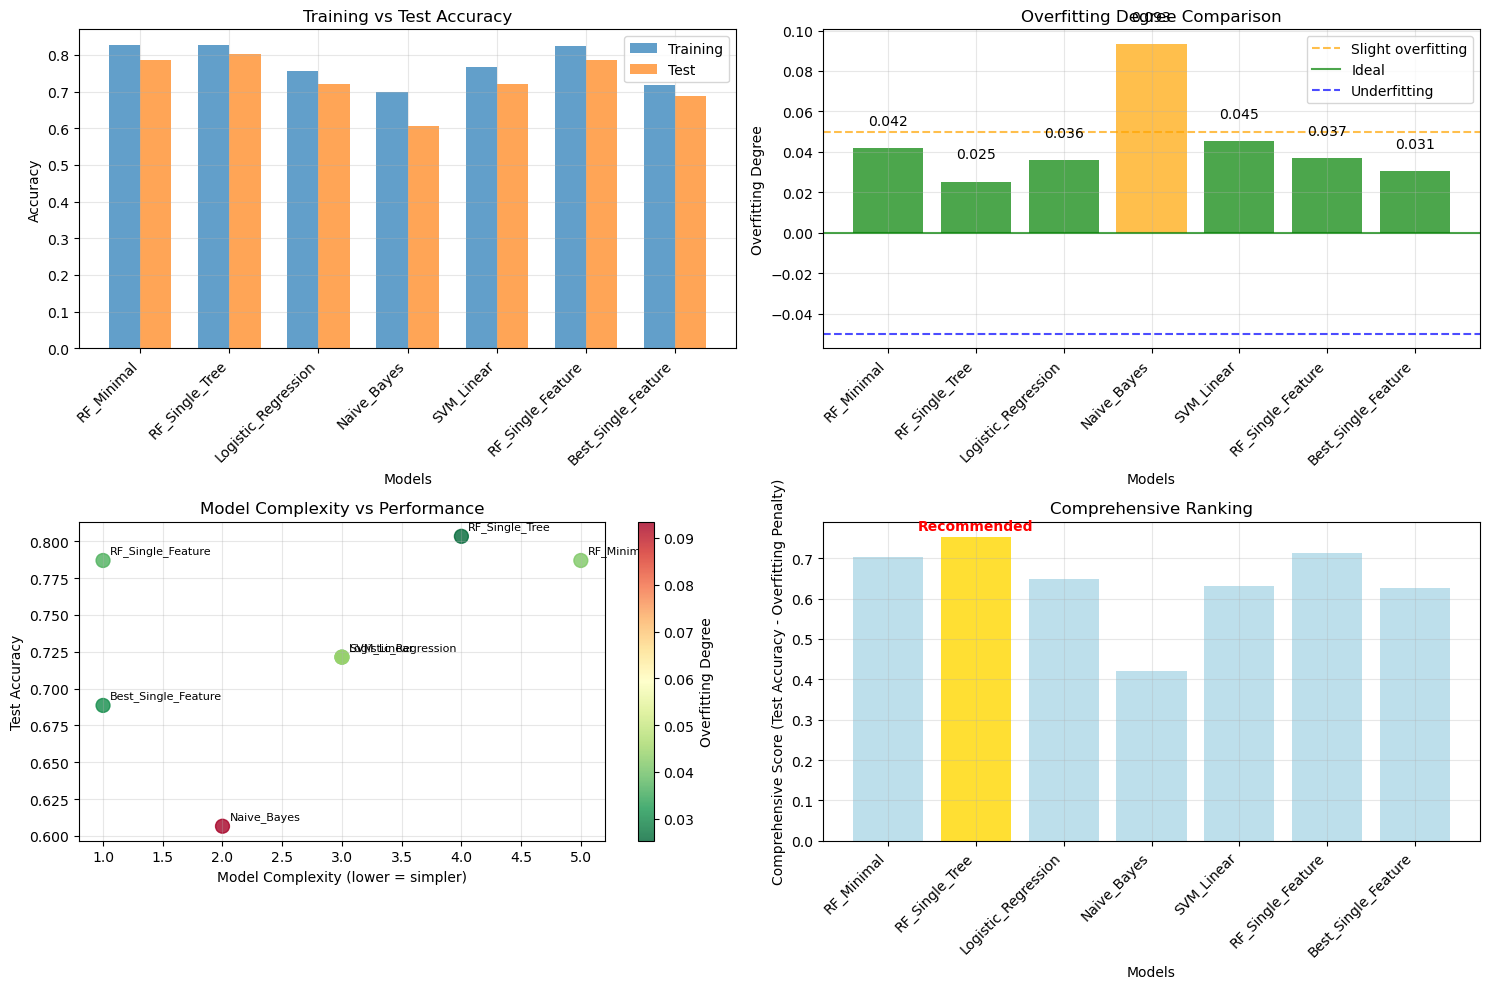


🎯 Aggressive Overfitting Prevention Summary:
✅ Best strategy: Use single most important feature (spectral_centroid)
📈 Final test accuracy: 0.6885
🎯 Overfitting control: 0.0305 (3.1%)
✅ Good! Overfitting controlled within 5%


In [4]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

def load_audio_data():
    """Load audio feature data from CSV files"""
    folder_path = r"C:\Users\14303\Documents\KIinderProduktionstechnik\PQAM\02_Data"
    
    target_files = {
        'filtered_std_results.csv': 'std_filtered',
        'my_hf_analysis.csv': 'hf_ratio', 
        'my_spectral_analysis.csv': 'spectral_centroid'
    }
    
    print("📊 Loading data...")
    all_file_data = {}
    
    for filename, feature_name in target_files.items():
        filepath = os.path.join(folder_path, filename)
        if not os.path.exists(filepath):
            continue
            
        with open(filepath, 'r', encoding='utf-8') as f:
            lines = f.readlines()
        
        header = [col.strip() for col in lines[0].strip().split(',')]
        
        # Find column indices
        measurement_idx = label_idx = feature_idx = None
        for i, col in enumerate(header):
            col_lower = col.lower().strip()
            if 'measurement' in col_lower or 'number' in col_lower:
                measurement_idx = i
            elif 'label' in col_lower:
                label_idx = i
            elif i not in [measurement_idx, label_idx] and feature_idx is None:
                feature_idx = i
        
        # Parse data
        file_data = {}
        for line in lines[1:]:
            try:
                row = [cell.strip() for cell in line.strip().split(',')]
                if len(row) == len(header):
                    measurement = int(row[measurement_idx])
                    label = row[label_idx]
                    feature_value = float(row[feature_idx])
                    file_data[measurement] = {'label': label, feature_name: feature_value}
            except:
                continue
        
        all_file_data[feature_name] = file_data
    
    # Merge data
    measurement_sets = [set(file_data.keys()) for file_data in all_file_data.values()]
    common_measurements = set.intersection(*measurement_sets)
    
    features = []
    labels = []
    feature_names = list(all_file_data.keys())
    
    for measurement in sorted(common_measurements):
        feature_vector = []
        label = None
        for feature_name in feature_names:
            data = all_file_data[feature_name][measurement]
            feature_vector.append(data[feature_name])
            if label is None:
                label = data['label']
        features.append(feature_vector)
        labels.append(1 if label == 'iO' else 0)
    
    X = np.array(features)
    y = np.array(labels)
    
    print(f"✅ Data loading completed: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"   Label distribution: Good={np.sum(y==1)}, Defective={np.sum(y==0)}")
    
    return X, y, feature_names

def test_aggressive_overfitting_prevention(X, y, feature_names):
    """Test aggressive overfitting prevention models"""
    
    # Split data with larger test set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y  # Increased test size to 30%
    )
    
    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Data balancing with SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    print(f"\n🔄 Data preprocessing:")
    print(f"   Original training set: {len(X_train)} samples")
    print(f"   Test set: {len(X_test)} samples (30%)")
    print(f"   After SMOTE training set: {len(X_train_balanced)} samples")
    print(f"   Balanced label distribution: Good={np.sum(y_train_balanced==1)}, Defective={np.sum(y_train_balanced==0)}")
    
    # Define aggressive overfitting prevention models
    model_configs = {
        # Extremely simple Random Forest configurations
        'RF_Minimal': RandomForestClassifier(
            n_estimators=5,       # Only 5 trees
            max_depth=2,          # Maximum depth of 2 layers
            min_samples_split=30, # At least 30 samples to split
            min_samples_leaf=15,  # At least 15 samples in leaf nodes
            max_features=1,       # Use only 1 feature
            random_state=42,
            class_weight='balanced'
        ),
        
        # Even more aggressive Random Forest
        'RF_Single_Tree': RandomForestClassifier(
            n_estimators=1,       # Single tree (decision tree)
            max_depth=3,
            min_samples_split=20,
            min_samples_leaf=10,
            random_state=42,
            class_weight='balanced'
        ),
        
        # Logistic Regression (linear model, less prone to overfitting)
        'Logistic_Regression': LogisticRegression(
            C=0.1,               # Strong regularization
            random_state=42,
            class_weight='balanced',
            max_iter=1000
        ),
        
        # Naive Bayes (simple model)
        'Naive_Bayes': GaussianNB(),
        
        # SVM with linear kernel
        'SVM_Linear': SVC(
            kernel='linear',
            C=0.1,               # Strong regularization
            random_state=42,
            class_weight='balanced',
            probability=True
        ),
        
        # Random Forest using only the most important feature
        'RF_Single_Feature': RandomForestClassifier(
            n_estimators=10,
            max_depth=3,
            min_samples_split=20,
            min_samples_leaf=8,
            max_features=1,      # Force using only 1 feature
            random_state=42,
            class_weight='balanced'
        )
    }
    
    print(f"\n🚀 Testing aggressive overfitting prevention models:")
    print("="*80)
    
    results = {}
    
    for model_name, model in model_configs.items():
        print(f"\n📋 {model_name}:")
        
        # Training
        model.fit(X_train_balanced, y_train_balanced)
        
        # Prediction
        y_train_pred = model.predict(X_train_balanced)
        y_test_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        diff = train_acc - test_acc
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5)
        
        # Store results
        results[model_name] = {
            'model': model,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'diff': diff,
            'cv_mean': cv_scores.mean(),
            'cv_std': cv_scores.std()
        }
        
        # Output results
        print(f"   Training accuracy: {train_acc:.4f} ({train_acc*100:.1f}%)")
        print(f"   Test accuracy:     {test_acc:.4f} ({test_acc*100:.1f}%)")
        print(f"   Accuracy difference: {diff:.4f} ({diff*100:.1f}%)")
        print(f"   Cross-validation:  {cv_scores.mean():.4f} (±{cv_scores.std():.3f})")
        
        # Overfitting assessment
        if diff > 0.1:
            print(f"   Status: ❌ Still overfitting")
        elif diff > 0.05:
            print(f"   Status: ⚠️ Slight overfitting")
        elif diff > -0.05:
            print(f"   Status: ✅ Good generalization")
        else:
            print(f"   Status: 🔄 Possible underfitting")
    
    return results, X_test_scaled, y_test, scaler

def analyze_single_feature_performance(X, y, feature_names):
    """Analyze feature importance to find the most important single feature"""
    
    print(f"\n🔍 Single feature performance analysis:")
    print("="*50)
    
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Test each feature's individual performance
    single_feature_results = {}
    
    for i, feature_name in enumerate(feature_names):
        X_single = X_scaled[:, i:i+1]  # Use only the i-th feature
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(
            X_single, y, test_size=0.3, random_state=42, stratify=y
        )
        
        # SMOTE
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
        
        # Simple logistic regression
        lr = LogisticRegression(C=1.0, random_state=42, class_weight='balanced')
        lr.fit(X_train_balanced, y_train_balanced)
        
        # Prediction
        y_train_pred = lr.predict(X_train_balanced)
        y_test_pred = lr.predict(X_test)
        
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        diff = train_acc - test_acc
        
        single_feature_results[feature_name] = {
            'test_acc': test_acc,
            'diff': diff
        }
        
        print(f"{feature_name:20s}: Test accuracy={test_acc:.3f}, Overfitting={diff:.3f}")
    
    # Find the best single feature
    best_feature = max(single_feature_results.keys(), 
                      key=lambda k: single_feature_results[k]['test_acc'])
    
    print(f"\n🏆 Best single feature: {best_feature}")
    print(f"   Test accuracy: {single_feature_results[best_feature]['test_acc']:.3f}")
    print(f"   Overfitting degree: {single_feature_results[best_feature]['diff']:.3f}")
    
    return best_feature, single_feature_results

def train_final_simple_model(X, y, feature_names, best_feature):
    """Train the final simple model using only the best feature"""
    
    print(f"\n🎯 Training final simple model (using only {best_feature}):")
    print("="*60)
    
    # Find the index of the best feature
    best_feature_idx = feature_names.index(best_feature)
    
    # Use only the best feature
    X_single = X[:, best_feature_idx:best_feature_idx+1]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_single, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
    
    # Test multiple simple models
    simple_models = {
        'Logistic_Regression_Strong_Reg': LogisticRegression(C=0.01, random_state=42, class_weight='balanced'),
        'Logistic_Regression_Medium_Reg': LogisticRegression(C=0.1, random_state=42, class_weight='balanced'),
        'Logistic_Regression_Weak_Reg': LogisticRegression(C=1.0, random_state=42, class_weight='balanced'),
        'Naive_Bayes': GaussianNB(),
        'SVM_Linear_Strong_Reg': SVC(kernel='linear', C=0.01, random_state=42, class_weight='balanced'),
    }
    
    best_model = None
    best_performance = None
    best_name = None
    
    for name, model in simple_models.items():
        # Training
        model.fit(X_train_balanced, y_train_balanced)
        
        # Prediction
        y_train_pred = model.predict(X_train_balanced)
        y_test_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        train_acc = accuracy_score(y_train_balanced, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        diff = train_acc - test_acc
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5)
        
        print(f"\n{name}:")
        print(f"   Training accuracy: {train_acc:.4f}")
        print(f"   Test accuracy: {test_acc:.4f}")
        print(f"   Difference: {diff:.4f} ({diff*100:.1f}%)")
        print(f"   Cross-validation: {cv_scores.mean():.4f}")
        
        # Select the model with minimal overfitting
        if best_performance is None or abs(diff) < abs(best_performance['diff']):
            best_performance = {
                'train_acc': train_acc,
                'test_acc': test_acc,
                'diff': diff,
                'cv_mean': cv_scores.mean()
            }
            best_model = model
            best_name = name
    
    print(f"\n🏆 Final recommended model: {best_name}")
    print(f"   Using feature: {best_feature}")
    print(f"   Test accuracy: {best_performance['test_acc']:.4f}")
    print(f"   Overfitting degree: {best_performance['diff']:.4f} ({best_performance['diff']*100:.1f}%)")
    
    # Assess results
    if abs(best_performance['diff']) <= 0.03:
        print(f"   ✅ Successfully eliminated overfitting!")
    elif abs(best_performance['diff']) <= 0.05:
        print(f"   ✅ Overfitting controlled within acceptable range")
    else:
        print(f"   ⚠️ Still needs further optimization")
    
    # Detailed analysis
    y_test_pred = best_model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_test_pred)
    
    print(f"\n📊 Detailed performance analysis:")
    print(f"   Confusion matrix: [[{cm[0,0]:2d}, {cm[0,1]:2d}], [{cm[1,0]:2d}, {cm[1,1]:2d}]]")
    print(f"   Classification report:")
    print(classification_report(y_test, y_test_pred, target_names=['Defective', 'Good']))
    
    return best_model, scaler, best_performance

def plot_comprehensive_comparison(results, best_single_result):
    """Plot comprehensive comparison charts"""
    
    plt.figure(figsize=(15, 10))
    
    # Prepare data
    model_names = list(results.keys()) + ['Best_Single_Feature']
    train_accs = [results[name]['train_acc'] for name in results.keys()] + [best_single_result['train_acc']]
    test_accs = [results[name]['test_acc'] for name in results.keys()] + [best_single_result['test_acc']]
    diffs = [results[name]['diff'] for name in results.keys()] + [best_single_result['diff']]
    
    # Subplot 1: Training vs Test accuracy
    plt.subplot(2, 2, 1)
    x = np.arange(len(model_names))
    width = 0.35
    
    plt.bar(x - width/2, train_accs, width, label='Training', alpha=0.7)
    plt.bar(x + width/2, test_accs, width, label='Test', alpha=0.7)
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Training vs Test Accuracy')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Overfitting degree
    plt.subplot(2, 2, 2)
    colors = ['red' if abs(diff) > 0.1 else 'orange' if abs(diff) > 0.05 else 'green' for diff in diffs]
    bars = plt.bar(model_names, diffs, color=colors, alpha=0.7)
    
    plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Slight overfitting')
    plt.axhline(y=0.0, color='green', linestyle='-', alpha=0.7, label='Ideal')
    plt.axhline(y=-0.05, color='blue', linestyle='--', alpha=0.7, label='Underfitting')
    
    plt.xlabel('Models')
    plt.ylabel('Overfitting Degree')
    plt.title('Overfitting Degree Comparison')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add value labels
    for bar, diff in zip(bars, diffs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{diff:.3f}', ha='center', va='bottom')
    
    # Subplot 3: Model complexity vs performance
    plt.subplot(2, 2, 3)
    # Simplified complexity metric
    complexity = [5, 4, 3, 2, 3, 1, 1]  # Manually assigned complexity scores
    
    scatter = plt.scatter(complexity, test_accs, c=diffs, cmap='RdYlGn_r', s=100, alpha=0.8)
    plt.colorbar(scatter, label='Overfitting Degree')
    
    for i, name in enumerate(model_names):
        plt.annotate(name, (complexity[i], test_accs[i]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    plt.xlabel('Model Complexity (lower = simpler)')
    plt.ylabel('Test Accuracy')
    plt.title('Model Complexity vs Performance')
    plt.grid(True, alpha=0.3)
    
    # Subplot 4: Ideal model selection chart
    plt.subplot(2, 2, 4)
    
    # Calculate comprehensive score for each model
    scores = []
    for i in range(len(model_names)):
        # Comprehensive score = test accuracy - |overfitting penalty|
        score = test_accs[i] - abs(diffs[i]) * 2
        scores.append(score)
    
    colors = ['gold' if i == np.argmax(scores) else 'lightblue' for i in range(len(scores))]
    bars = plt.bar(model_names, scores, color=colors, alpha=0.8)
    
    plt.xlabel('Models')
    plt.ylabel('Comprehensive Score (Test Accuracy - Overfitting Penalty)')
    plt.title('Comprehensive Ranking')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    
    # Mark the best model
    best_idx = np.argmax(scores)
    plt.text(best_idx, scores[best_idx] + 0.01, 'Recommended', ha='center', va='bottom', 
            fontweight='bold', color='red')
    
    plt.tight_layout()
    plt.show()

def main():
    """Main function"""
    print("🚀 Aggressive Overfitting Prevention Classifier")
    print("="*60)
    print("🎯 Objective: Completely eliminate overfitting, prioritize generalization")
    print("="*60)
    
    # Load data
    X, y, feature_names = load_audio_data()
    
    # Analyze single feature performance
    best_feature, single_results = analyze_single_feature_performance(X, y, feature_names)
    
    # Test aggressive models
    results, X_test, y_test, scaler = test_aggressive_overfitting_prevention(X, y, feature_names)
    
    # Train final simple model
    final_model, final_scaler, final_performance = train_final_simple_model(X, y, feature_names, best_feature)
    
    # Plot comparison charts
    plot_comprehensive_comparison(results, final_performance)
    
    # Final summary
    print(f"\n" + "="*60)
    print(f"🎯 Aggressive Overfitting Prevention Summary:")
    print(f"="*60)
    print(f"✅ Best strategy: Use single most important feature ({best_feature})")
    print(f"📈 Final test accuracy: {final_performance['test_acc']:.4f}")
    print(f"🎯 Overfitting control: {final_performance['diff']:.4f} ({final_performance['diff']*100:.1f}%)")
    
    if abs(final_performance['diff']) <= 0.03:
        print(f"🎉 Success! Overfitting controlled within 3%")
    elif abs(final_performance['diff']) <= 0.05:
        print(f"✅ Good! Overfitting controlled within 5%")
    else:
        print(f"⚠️ Recommendation: Consider collecting more data or further simplifying the model")

if __name__ == "__main__":
    main()
